In [1]:
import Vid_to_Strain as predict
from tqdm import tqdm
import os
import loader
import statistics
import matplotlib.pyplot as plt
import ast
import scipy
import numpy as np
import math
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.metrics import r2_score

def flatten_list(_2d_list):
    flat_list = []
    for element in _2d_list:
        if type(element) is list:
            for item in element:
                flat_list.append(float(item))
        else:
            flat_list.append(element)
    return flat_list

root = "/Users/ishan/Box/Strain Study"

## Running Strain Script

In [2]:
dataset_run = "a4c"
flip_condition = False

netherlands_dataset = os.path.join(root, "Netherlands") #2,534 videos
netherlands2_dataset = os.path.join(root, "Netherlands2", "LV_preprocessed") #749 videos
a4c_dataset = os.path.join(root, "StrainStudyA4c-Preprocessed") #167 videos

weights_path = os.path.join(root, "Weights-20201103T193519Z-001", "Weights", "deeplabv3_resnet50_random.pt")
segmentations_path = os.path.join(root, "Ishan", "IIRFilter", dataset_run, "segmentations")
strains_path = os.path.join(root, "Ishan", "IIRFilter", dataset_run, "strains")
plot_path = os.path.join(root, "Ishan", "IIRFilter", dataset_run, "plot")
excel_path = os.path.join(root, "Ishan", "IIRFilter", dataset_run, "excel")

# Choosing dataset to run
if dataset_run == "Netherlands":
    dataset = netherlands_dataset
    flip_condition = True
elif dataset_run == "Netherlands2":
    dataset = netherlands2_dataset
    flip_condition = True
else:
    dataset = a4c_dataset
    flip_condition = False

count = 0
# Loop to run script on dataset
for video in tqdm(os.listdir(dataset)):
    videoSplit = os.path.splitext(video)
    extensionName = videoSplit[1]
    
    count += 1
    if extensionName == ".avi":
        videoPath = os.path.join(dataset, video)
        
        try:
            predict.estimate_strain(videoPath, flip=flip_condition, weights=weights_path, segmentation_dir=segmentations_path,
                                strain_dir=strains_path, plot_dir=plot_path, excel_dir=excel_path, dilations=1, point_radius=1)
        except:
            break

  0%|          | 0/168 [00:00<?, ?it/s]


## Create CSV

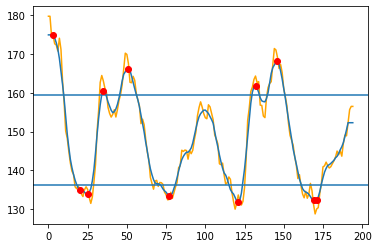

In [73]:
def method1(arr):
    x, y = [], []
    
    plt.plot(arr, color='orange')
    arr = scipy.signal.savgol_filter(arr, 3 * 2 + 1, 0)
    plt.plot(arr)
    
    topNumPercent = int(len(arr) * 0.2)
    maxThreshold = sorted(arr, reverse=True)[:topNumPercent][-1]
    minThreshold = sorted(arr, reverse=False)[:topNumPercent][-1]
    plt.axhline(y=maxThreshold)
    plt.axhline(y=minThreshold)
    for i in range(len(arr)):
        if arr[i] > maxThreshold:
            if arr[i] > arr[i - 1]:
                if arr[i] > arr[i + 1]:
                    plt.plot(i, arr[i], 'ro')
        if arr[i] < minThreshold:
            if arr[i] < arr[i - 1]:
                if arr[i] < arr[i + 1]:
                    plt.plot(i, arr[i], 'ro')

df = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Moving Average/a4c/excel/2PXH1X7N_4_EPIQ7C_NO.csv")
lengths = df['length'].tolist()
lengths = [lengths[0]]+lengths+[lengths[-1]]

method1(lengths)

In [36]:
# Returns dictionary of ratios from calc_ratio function
excel_path = "/Users/ishan/Box/Strain Study/Strain Study Dilation Analysis/a4c Dilation 3/Excel" #"/Users/ishan/Box/Strain Study/Ishan/Moving Average/a4c/excel"#"/Users/ishan/Box/Strain Study/Strain Study Dilation Analysis/a4c Dilation 5/Excel" #"/Users/ishan/Box/Strain Study/Released Data New/Excel"

chosen_filter = "Savgol"

algo_dict = {}
for excel in tqdm(os.listdir(excel_path)):

    excel_file = os.path.join(excel_path, excel) # path to excel file

    id_num = 1
    df = pd.read_csv(excel_file)
    lengths = df['length'].tolist() # array of lengths of each frame in given video

    ratios = predict.calc_ratio(lengths, "/Users/ishan/Box/Strain Study/Ishan/" + chosen_filter + "/plot", 
                                os.path.basename(excel), save=False, window_size = 3,
                                smoothening_function=chosen_filter) # calculate ratio
    # Export Data to Dictionary
    if len(ratios) > 0: # a list that is not empty
        machine = os.path.splitext(excel.split("_")[2])[0]
        id_num = excel.split("_")[1]

        if machine not in algo_dict:
            algo_dict[machine] = {}

        if id_num not in algo_dict[machine]:
            algo_dict[machine][id_num] = []
        
        for i in range(len(ratios)):
            ratios[i] = (ratios[i] * 100) - 100

        algo_dict[machine][id_num].append(ratios)


algo_dict


100%|██████████| 166/166 [00:00<00:00, 197.94it/s]


{'EPIQ7C': {'1': [[-18.155302928103097,
    -17.87213243505198,
    -16.69918555448045,
    -15.710632156555391],
   [-15.767237855109954,
    -14.627154893627733,
    -13.965022314284326,
    -13.735531640791805],
   [-20.48978186384531,
    -16.258673713375032,
    -15.548602668204708,
    -14.697916471242422],
   [-15.241327465970627, -14.752847308539657, -12.650652560499935],
   [-18.57960722772745,
    -16.18592526013748,
    -14.171738685134017,
    -13.978022872936918],
   [-15.511972715392375,
    -14.532762719220003,
    -13.440730476857425,
    -12.203031436816985]],
  '4': [[-15.556990576956068, -10.362847830650637],
   [-18.96146091806017,
    -17.176304445862257,
    -13.794769297366344,
    -12.982115370544648],
   [-13.592859809622297, -13.105481832665703, -11.399578222339585],
   [-15.04221704287805,
    -14.357141710939487,
    -13.692259604168328,
    -13.321699228493586]],
  '2': [[-15.304324164195961,
    -15.205504264661798,
    -14.718651275959829,
    -12.5469961

In [3]:
# Create CSV from Algo Dict
import csv

a_file = open("/Users/ishan/Box/Strain Study/Ishan/Moving Average/Moving Average D6 Strain Lengths.csv", "w")#open("/Users/ishan/Box/Strain Study/Released Data New/ConvolveAverage_StrainReleasedDataNew.csv", "w")

writer = csv.writer(a_file)
writer.writerow(["Video Name", "Strain Values"])
for key, value in algo_dict.items():
    for i in value:
        writer.writerow([key, value[i]])

a_file.close()

In [37]:
# Create CSV with new columns for each patient ID with algorithm
reader_df = pd.read_csv("/Users/ishan/Box/Strain Study/Strain_Study_Reader.csv")
for machine in algo_dict:
    for id_num in algo_dict[machine]:
        #average = (sum(algo_dict[machine][id_num]))/(len(algo_dict[machine][id_num]))
        row_num = reader_df[reader_df['ID'] == int(id_num)].index
        if len(row_num) > 0: # found matching row
            reader_df.loc[row_num[0], machine] = str(algo_dict[machine][id_num])

reader_df.to_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol D3 Strain Lengths.csv")


## Variance Plot

In [104]:
# Arrange Dataframe by Mean Value
#dataframe = pd.DataFrame(algo_dict)
convolve_average_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/ConvolveAverage/ConvolveAverage Strain Lengths.csv")
savgol_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol Strain Lengths.csv")
moving_average_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Moving Average/Moving Average Strain Lengths.csv")
fft_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/FFT/FFT Strain Lengths.csv")
low_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/low/Low Strain Lengths.csv")

def arrangeDF(df):
    def findMean(x):
        if str(x) != "nan":
            return np.mean(flatten_list(ast.literal_eval(x)))
        else:
            return None

    df["Mean_Value"] = df["EPIQ7C"].apply(findMean)#df["Strain Values"].apply(findMean)
    df = df.sort_values(by="Mean_Value")
    return df

convolve_average_csv = arrangeDF(convolve_average_csv)
savgol_csv = arrangeDF(savgol_csv)
moving_average_csv = arrangeDF(moving_average_csv)
fft_csv = arrangeDF(fft_csv)
low_csv = arrangeDF(low_csv)

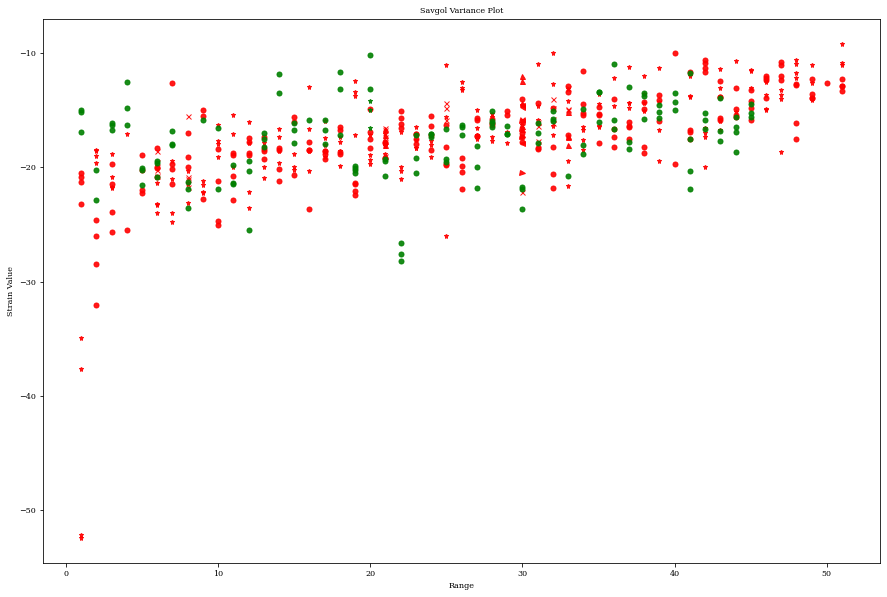

In [157]:
# Variance plot for every strain across each patient

#plt.rcParams["figure.figsize"] = (20,10)

method = "Savgol" #Convolve Average

if method == "Savgol":
    d = savgol_csv
elif method == "Convolve Average":
    d = convolve_average_csv
elif method == "Moving Average":
    d = moving_average_csv
elif method == "FFT":
    d = fft_csv
elif method == "Low":
    d = low_csv

shape = [".", "o", "*", "x", "^", ">", "<"]#["o", ">", "v", "^", "h", "8", "1", "2", "3", "4", "x", "*", "<", ","]
color = ["red", "blue"]

# fig = plt.gcf()
# fig.set_size_inches(27, 19)
plt.figure(figsize=(15,10))

# Plotting EPIQ7C
# rangeCount = 0
# for patient in d["EPIQ7C"]:#d["Strain Values"]:
#     if str(patient) != "nan":
#         rangeCount += 1
#         patient = ast.literal_eval(patient)
#         patient = sorted([item for sublist in patient for item in sublist])
        
#         plt.plot([rangeCount, rangeCount], [patient[0], patient[-1]], color="gray", alpha=0.7)
        
# Plotting EPIQ7C
rangeCount = 0
for patient in d["EPIQ7C"]:#d["Strain Values"]:
    if str(patient) != "nan":
        rangeCount += 1
        
        # plotting every other point
        patient = ast.literal_eval(patient)
        #patient = sorted([item for sublist in patient for item in sublist])
        
        index = 0
        for video in patient:
            index += 1
            for estimated_strain in video:
                plt.plot([rangeCount], [estimated_strain], "bo", marker=shape[index], color="red", alpha=0.9, markersize=5)
        
        # Finding outliers and plotting red
#         q1, q3 = np.percentile(np.array(patient), [75 ,25])
#         iqr = q3 - q1
#         lower_bound = q1 -(1.5 * iqr)
#         upper_bound = q3 +(1.5 * iqr) 
        
#         index = 0
#         for subvalue in patient:
#             index += 1
#             if (abs(subvalue) > abs(upper_bound)) or (abs(subvalue) < abs(lower_bound)):
#                 #plt.plot([rangeCount], [subvalue], "bo", color="red", alpha=0.9, markersize=5)
#             else:
#                 if (index != 0) and (index != len(patient)):
#                     plt.plot([rangeCount], [subvalue], "bo", marker=shape[index], color="blue", alpha=0.9, markersize=5)

# Plotting VividE95
# rangeCount = 0
# for patient in d["VividE95"]:#d["Strain Values"]:
#     if str(patient) != "nan":
#         rangeCount += 1
#         patient = ast.literal_eval(patient)
#         patient = sorted([item for sublist in patient for item in sublist])
        
#         plt.plot([rangeCount, rangeCount], [patient[0], patient[-1]], color="black", alpha=0.7)

rangeCount = 0
for patient in d["VividE95"]:#d["Strain Values"]:
    if str(patient) != "nan":
        rangeCount += 1
        
        # plotting every other point
        patient = ast.literal_eval(patient)
        #patient = sorted([item for sublist in patient for item in sublist])
        index = 0
        for video in patient:
            index += 1
            for estimated_strain in video:
                plt.plot([rangeCount], [estimated_strain], "bo", marker=shape[index], color="green", alpha=0.9, markersize=5)
        
        # Finding outliers and plotting red
#         q1, q3 = np.percentile(np.array(patient), [75 ,25])
#         iqr = q3 - q1
#         lower_bound = q1 -(1.5 * iqr)
#         upper_bound = q3 +(1.5 * iqr) 
        
#         index = 0
#         for subvalue in patient:
#             index += 1
#             if (abs(subvalue) > abs(upper_bound)) or (abs(subvalue) < abs(lower_bound)):
#                 plt.plot([rangeCount], [subvalue], "bo", marker="^", color="green", alpha=0.9, markersize=5)
#             else:
#                 if (index != 0) and (index != len(patient)):
#                     plt.plot([rangeCount], [subvalue], "bo", marker=shape[index], color="red", alpha=0.9, markersize=5)
                    
plt.title(method + " Variance Plot")
plt.xlabel("Range")
plt.ylabel("Strain Value")
plt.savefig("/Users/ishan/Box/Strain Study/Ishan/Savgol/Key Plots/" + method + " Variance.png")


## Analysis/Statistics

In [173]:
# Paired T-Test
from scipy import stats

data_csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Moving Average/Moving Average D5 Strain Lengths.csv")

# Set AlgoMaxMin
row = 0
for patient in data_csv["EPIQ7C"]:
    if str(patient) != "nan":
        patient = ast.literal_eval(patient)
#         for i in range(len(patient)):
#             print(patient[i])
#             patient[i] = sum(patient[i])/len(patient[i])
        patient = [item for sublist in patient for item in sublist]
        
        avg_value = sum(patient)/len(patient)
        
        value = (max(patient) - min(patient))/avg_value
    else:
        value = "nan"
    
    data_csv.at[row, "AlgMaxMin"] = value
    row += 1

# Set HumanMaxMin
maxHumanValues = data_csv[["Philips 1", "Philips 2", "GE 1", "GE 2"]].max(axis=1)
minHumanValues = data_csv[["Philips 1", "Philips 2", "GE 1", "GE 2"]].min(axis=1)
averageHumanValues = data_csv[["Philips 1", "Philips 2", "GE 1", "GE 2"]].astype(float).mean(axis=1)

row = 0
for i in range(len(maxHumanValues)):
    data_csv.at[row, "HumanMaxMin"] = (maxHumanValues[i] - minHumanValues[i])/averageHumanValues[i]
    row += 1

x = stats.ttest_ind(data_csv["AlgMaxMin"], data_csv["HumanMaxMin"], nan_policy='omit')

data_csv["AlgMaxMin"].mean()

-0.45473744344736355

In [280]:
# Getting Total Number of Estimated Strain

dilation = ["", " D3", " D5"]

# Savgol
for d in dilation:
    strain_count = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol" + d +" Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            strain_count += len(patient)
    print(strain_count)

# Moving Average
for d in dilation:
    strain_count = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Moving Average/Moving Average" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            strain_count += len(patient)
    print(strain_count)

# Convolve Average
for d in dilation:
    strain_count = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/ConvolveAverage/ConvolveAverage" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            strain_count += len(patient)
    print(strain_count)

    
# Low
for d in dilation:
    strain_count = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/low/Low" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            strain_count += len(patient)
    print(strain_count)



416
408
411
430
424
425
420
411
415
415
405
408


In [279]:
# Number of Bad Videos

dilation = ["", " D3", " D5"]

# Savgol
for d in dilation:
    bad_video = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol" + d +" Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            
            for strain in patient:
                if strain > 0:
                    bad_video += 1
    print(bad_video)

# Moving Average
for d in dilation:
    bad_video = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Moving Average/Moving Average" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            for strain in patient:
                if strain > 0:
                    bad_video += 1
    print(bad_video)

# Convolve Average
for d in dilation:
    bad_video = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/ConvolveAverage/ConvolveAverage" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            for strain in patient:
                if strain > 0:
                    bad_video += 1
    print(bad_video)

    
# Low
for d in dilation:
    bad_video = 0
    csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/low/Low" + d + " Strain Lengths.csv")
    for patient in csv["EPIQ7C"]:
        if str(patient) != "nan":
            patient = ast.literal_eval(patient)
            patient = [item for sublist in patient for item in sublist]
            for strain in patient:
                if strain > 0:
                    bad_video += 1
    print(bad_video)


0
0
0
0
0
0
0
0
0
0
0
0


In [342]:
# EF against Strain (Small Dataset)
ef_df = pd.read_csv("/Users/ishan/Box/Strain Study/Strain Study Reader EF Measurments.csv")

dilation = ["", " D3", " D5"]
filter_type = [["Savgol", "Savgol"], ["Moving Average", "Moving Average"], ["ConvolveAverage", "ConvolveAverage"], ["low", "Low"]]

for f in filter_type:
    for d in dilation:
        csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")
        x, y = [], []
        
        for index, row in csv.iterrows():
            flat_list = []
            epiq = row["EPIQ7C"]
            vivid = row["VividE95"]
            
            ef = ef_df.iloc[index]['4ch-EF-R1']
            
            if (str(epiq) != "nan"):
                epiq = ast.literal_eval(row["EPIQ7C"])
                epiq = [item for sublist in epiq for item in sublist]
                for e in epiq:
                    flat_list.append(e)
        
            if (str(vivid) != "nan"):
                vivid = ast.literal_eval(row["VividE95"])
                vivid = [item for sublist in vivid for item in sublist]
                for v in vivid:
                    flat_list.append(v)
            
            if (str(vivid) != "nan") or (str(epiq) != "nan"):
                if (str(ef) != "nan"):
                    x.append(np.mean(flat_list))
                    y.append(ef)
        
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        
        print(r_squared)
        

0.010639805581486823
0.0004129077830323791
0.003750203618647135
0.0022231058374354417
0.0006927321880008355
0.0029479693992303753
0.014519255014109295
0.0004801848469096481
0.0035528997408768364
0.03140449419523811
0.006249495994494539
0.007166022384734934


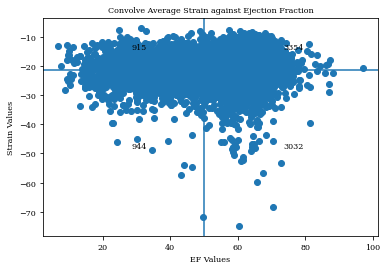

In [8]:
# EF against Strain Values (Big Dataset)
EF_values = pd.read_csv("/Users/ishan/Documents/Stanford/Ouyang/EchoData/FileList.csv")

x, y = [], []
for i in dataframe["Mean_Value"]:
    try:
        value_index = dataframe.loc[dataframe.Mean_Value == i].index[0]
        EF_value = EF_values["EF"].iloc[[value_index][0]]
        if (str(EF_value) != "nan") and (str(i) != "nan"):
            x.append(EF_value)
            y.append(i)
    except:
        continue

plt.title("Convolve Average Strain against Ejection Fraction")
plt.xlabel("EF Values")
plt.ylabel("Strain Values")
plt.axvline(x=50)

midline = np.mean(y)
plt.axhline(y=midline)
plt.scatter(x, y)

q1, q2, q3, q4 = 0, 0, 0, 0
for i in range(len(x)):
    if (x[i] > 50) and (y[i] > midline):
        q1 += 1
    elif (x[i] < 50) and (y[i] > midline):
        q2 += 1
    elif (x[i] < 50) and (y[i] < midline):
        q3 += 1
    elif (x[i] > 50) and (y[i] < midline):
        q4 += 1

def midpoint(a, b):
    return (a + b)/2
plt.text(midpoint(max(x), 50), midpoint(midline, max(y)), str(q1))
plt.text(midpoint(min(x), 50), midpoint(midline, max(y)), str(q2))
plt.text(midpoint(min(x), 50), midpoint(midline, min(y)), str(q3))
plt.text(midpoint(max(x), 50), midpoint(midline, min(y)), str(q4))

plt.savefig("/Users/ishan/Box/Strain Study/Released Data New/Convolve Average EF vs. Strain.png")


In [330]:
# Scatter Plot of Reader against Algorithm

from sklearn.metrics import r2_score

reader = "Philips 1"

dilation = ["", " D3", " D5"]
filter_type = [["Savgol", "Savgol"], ["Moving Average", "Moving Average"], ["ConvolveAverage", "ConvolveAverage"], ["low", "Low"]]

for f in filter_type:
    for d in dilation:
        csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")
        x, y = [], []
        
        for index, row in csv.iterrows():
            flat_list = []
            epiq = row["EPIQ7C"]
            vivid = row["VividE95"]
            
            p1 = row["Philips 1"]
            p2 = row["Philips 2"]
            ge1 = row["GE 1"]
            ge2 = row["GE 2"]
            
            
            if (str(epiq) != "nan"):
                epiq = ast.literal_eval(row["EPIQ7C"])
                epiq = [item for sublist in epiq for item in sublist]
                for e in epiq:
                    flat_list.append(e)
        
            if (str(vivid) != "nan"):
                vivid = ast.literal_eval(row["VividE95"])
                vivid = [item for sublist in vivid for item in sublist]
                for v in vivid:
                    flat_list.append(v)
            
            if (str(vivid) != "nan") or (str(epiq) != "nan"):
                if (str(ge2) != "nan"):
                    x.append(np.mean(flat_list))
                    y.append(ge2)
        
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        
        print(r_squared)
        

0.09358103600388658
0.04249463679205904
0.08880043315412552
0.09515553999190547
0.07084097790050181
0.12053224260478218
0.10383257127392664
0.06066439176068609
0.09574251349919821
0.07465823252239845
0.046171901163231215
0.07906711138816576


Line of Best Fit: 0.4964189007021535x + -9.620957929409556
0.33647209877425954


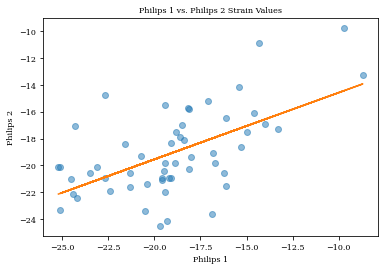

In [59]:
# Scatter Plot of Human vs. Human

all_data = pd.read_csv("/Users/ishan/Box/Strain Study/Strain_Study_Reader.csv")
reader1 = "Philips 1"
reader2 = "Philips 2"

x, y = [], []

reader_strain1 = all_data[reader1].values.tolist()
reader_strain2 = all_data[reader2].values.tolist()

for patient in range(len(all_data)):
    if (str(reader_strain2[patient]) != "nan") and (str(reader_strain1[patient]) != "nan"):
        reader1_strain_patient = reader_strain1[patient]
        reader2_strain_patient = reader_strain2[patient]

        x.append(reader1_strain_patient)
        y.append(reader2_strain_patient)


title = reader1 + ' vs. ' + reader2 + ' Strain Values' 
xlabel = reader1
ylabel = reader2
loader.scatterPlot(title=title, xlabel=xlabel, ylabel=ylabel, x1=x, y1=y, lineOfBestFit=True, save=True, 
                   location=" ",plotName=title + ".png")


In [296]:
# Mean and STD of Algorithm

dilation = ["", " D3", " D5"]
filter_type = [["Savgol", "Savgol"], ["Moving Average", "Moving Average"], ["ConvolveAverage", "ConvolveAverage"], ["low", "Low"]]

for f in filter_type:
    for d in dilation:
        csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")
        flat_list = []
        
        for index, row in csv.iterrows():
            
            epiq = row["EPIQ7C"]
            vivid = row["VividE95"]
            
            if (str(epiq) != "nan"):
                epiq = ast.literal_eval(row["EPIQ7C"])
                epiq = [item for sublist in epiq for item in sublist]
                #for e in epiq:
                flat_list.append(np.nanstd(epiq))
            
            if (str(vivid) != "nan"):
                vivid = ast.literal_eval(row["VividE95"])
                vivid = [item for sublist in vivid for item in sublist]
                #for v in vivid:
                flat_list.append(np.nanstd(v))
        print(np.mean(flat_list))


1.2365360674405679
1.0185108597907142
1.3208261613497023
1.3324738684246427
1.134938135008666
1.414797064876649
1.235359824826902
1.0314605605881044
1.3182519759364837
1.1528453297122705
1.0332514180547125
1.2196421226948306


Savgol  52 52
Line of Best Fit: 10.904568083483479x + 15.698753628383097
0.09051012067698416


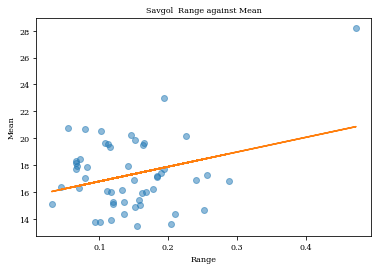

Savgol  D3 52 52
Line of Best Fit: 0.9446220911926252x + 15.051808034114487
0.0008773488954375047


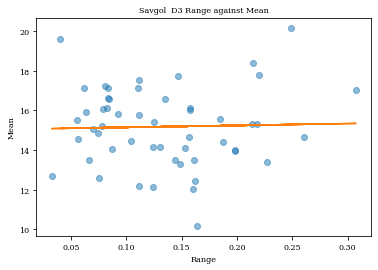

Savgol  D5 52 52
Line of Best Fit: 17.934289866478856x + 11.177488217890318
0.4621086330621182


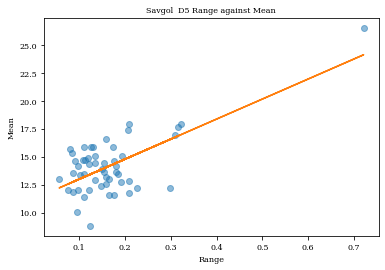

Moving Average  52 52
Line of Best Fit: 5.457811666067124x + 18.134869871338275
0.027879805189727314


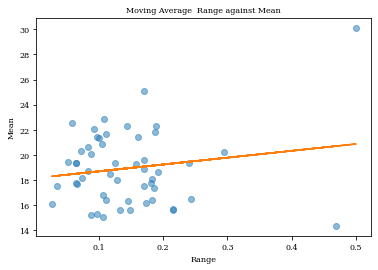

Moving Average  D3 52 52
Line of Best Fit: 0.9578267540735861x + 16.74973119923262
0.0011260108108276086


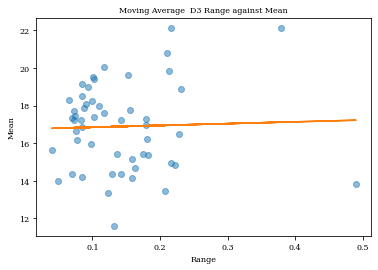

Moving Average  D5 52 52
Line of Best Fit: 18.642785934499383x + 13.263019051514384
0.3938265908070951


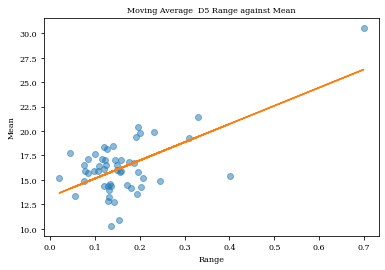

ConvolveAverage  52 52
Line of Best Fit: 11.366819837441259x + 15.83902340130825
0.11454660925028447


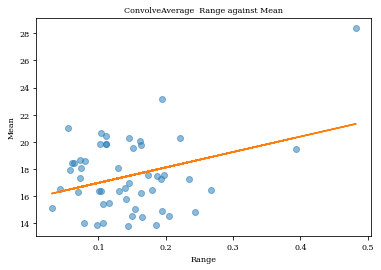

ConvolveAverage  D3 52 52
Line of Best Fit: 0.9937651793614115x + 15.181689648025365
0.0009319558884412325


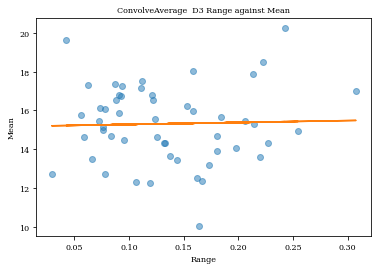

ConvolveAverage  D5 52 52
Line of Best Fit: 17.132711623175872x + 11.451064754296826
0.43232449510725435


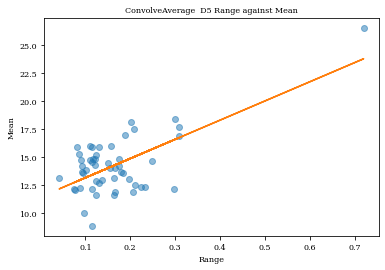

low  52 52
Line of Best Fit: 10.757442652772342x + 15.6218175927977
0.10212758007501795


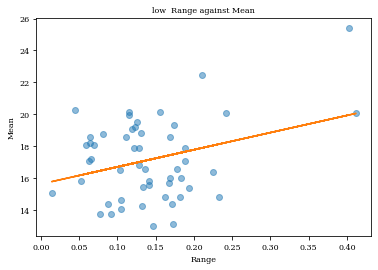

low  D3 52 52
Line of Best Fit: 5.073116844917629x + 14.166673921766954
0.032180681793962156


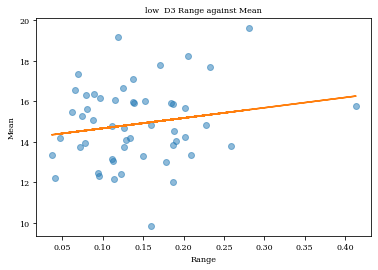

low  D5 52 52
Line of Best Fit: 15.79909635493149x + 10.998477222128948
0.3956314728060515


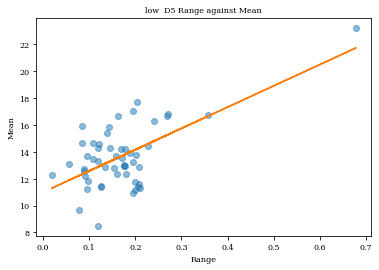

In [277]:
# Algorithm - Range against Strain

dilation = ["", " D3", " D5"]
filter_type = [["Savgol", "Savgol"], ["Moving Average", "Moving Average"], ["ConvolveAverage", "ConvolveAverage"], ["low", "Low"]]

for f in filter_type:
    for d in dilation:
        csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")
        x, y = [], []
        
        for index, row in csv.iterrows():
            flat_list = []
            
            epiq = row["EPIQ7C"]
            vivid = row["VividE95"]
            if (str(epiq) != "nan"):
                epiq = ast.literal_eval(row["EPIQ7C"])
                epiq = [item for sublist in epiq for item in sublist]
                for e in epiq:
                    flat_list.append(e)
            
            if (str(vivid) != "nan"):
                vivid = ast.literal_eval(row["VividE95"])
                vivid = [item for sublist in vivid for item in sublist]
                for v in vivid:
                    flat_list.append(v)
            
            if len(flat_list) > 0:
                x.append(np.nanstd(flat_list)/abs(np.mean(flat_list)))
                y.append(abs(np.mean(flat_list)))
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        print(f[0], d, len(x), len(y))
        
        title = f[0] + " " + d + " Range against Mean"
        xlabel = "Range"
        ylabel = "Mean"
        loader.scatterPlot(title=title, xlabel=xlabel, ylabel=ylabel, x1=x, y1=y, lineOfBestFit=True, save=True, 
                           location="/Users/ishan/Box/Strain Study/Ishan/", plotName=title + ".png")



In [278]:
# Mean Algorithm against Mean Human

dilation = ["", " D3", " D5"]
filter_type = [["Savgol", "Savgol"], ["Moving Average", "Moving Average"], ["ConvolveAverage", "ConvolveAverage"], ["low", "Low"]]

for f in filter_type:
    for d in dilation:
        csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")
        x, y = [], []
        
        for index, row in csv.iterrows():
            flat_list = []
            human_list = []
            
            epiq = row["EPIQ7C"]
            vivid = row["VividE95"]
            
            p1 = row["Philips 1"]
            p2 = row["Philips 2"]
            ge1 = row["GE 1"]
            ge2 = row["GE 2"]

            if (str(p1) != "nan"):
                human_list.append(p1)
            if (str(p2) != "nan"):
                human_list.append(p2)
            if (str(ge1) != "nan"):
                human_list.append(ge1)
            if (str(ge2) != "nan"):
                human_list.append(ge2)
                
            if (str(epiq) != "nan"):
                epiq = ast.literal_eval(row["EPIQ7C"])
                epiq = [item for sublist in epiq for item in sublist]
                for e in epiq:
                    flat_list.append(e)
            
            if (str(vivid) != "nan"):
                vivid = ast.literal_eval(row["VividE95"])
                vivid = [item for sublist in vivid for item in sublist]
                for v in vivid:
                    flat_list.append(v)
            
            if len(flat_list) > 0:
                x.append(np.mean(flat_list))
                y.append(np.mean(human_list))
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        
        print(r_squared)

0.16530010203551027
0.17601281432520993
0.13912601221814977
0.1722546946205747
0.1948768267949909
0.165184765583907
0.17367829937007245
0.2101284398909679
0.15057551721303303
0.1710885759566026
0.19285087012138238
0.15819045382269997


Line of Best Fit: -0.08993532689562679x + 3.895786465932055
0.021623094847747094


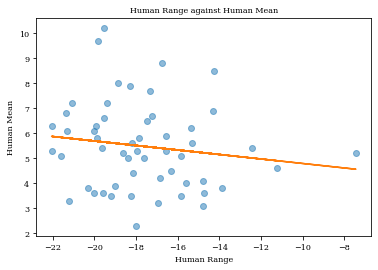

In [255]:
# Human - Range against Strain

x, y = [], []

csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/" + f[0] + "/" + f[1] + d +" Strain Lengths.csv")

for index, row in csv.iterrows():
    flat_list = []

    p1 = row["Philips 1"]
    p2 = row["Philips 2"]
    ge1 = row["GE 1"]
    ge2 = row["GE 2"]
    
    if (str(p1) != "nan"):
        flat_list.append(p1)
    if (str(p2) != "nan"):
        flat_list.append(p2)
    if (str(ge1) != "nan"):
        flat_list.append(ge1)
    if (str(ge2) != "nan"):
        flat_list.append(ge2)
    
    if len(flat_list) > 0:
        x.append(max(flat_list) - min(flat_list))
        y.append(np.mean(flat_list))
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

title = "Human Range against Human Mean"
xlabel = "Human Range"
ylabel = "Human Mean"
loader.scatterPlot(title=title, xlabel=xlabel, ylabel=ylabel, x1=y, y1=x, lineOfBestFit=True, save=True, 
                   location="/Users/ishan/Box/Strain Study/Ishan/", plotName=title + ".png")



## Confusion Matrix

In [384]:
# Correlation Matrix (Algorithm against Readers)

from sklearn.metrics import confusion_matrix

csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol Strain Lengths.csv")
csv["OverallHuman"] = csv[['Philips 1', 'GE 1', 'Philips 2', 'GE 2']].mean(axis=1)
csv["Reader1"] = csv[['Philips 1', 'GE 1']].mean(axis=1)
csv["Reader2"] = csv[['Philips 2', 'GE 2']].mean(axis=1)

for index, row in csv.iterrows():
    flat_list = []
    epiq = row["EPIQ7C"]
    vivid = row["VividE95"]

    if (str(epiq) != "nan"):
        epiq = ast.literal_eval(row["EPIQ7C"])
        epiq = [item for sublist in epiq for item in sublist]
        for e in epiq:
            flat_list.append(e)

    if (str(vivid) != "nan"):
        vivid = ast.literal_eval(row["VividE95"])
        vivid = [item for sublist in vivid for item in sublist]
        for v in vivid:
            flat_list.append(v)
    
    csv.loc[index,'AlgorithmMean'] = np.mean(flat_list)

threshold = -18
pd.crosstab(csv["Reader1"]>threshold,csv["AlgorithmMean"]>threshold, rownames=['True'], colnames=['Predicted'], margins=True)


/Users/ishan/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ishan/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Predicted,False,True,All
True,,,
False,12,13,25
True,6,23,29
All,18,36,54


In [365]:
# Correlation Matrix (Human against Human)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("/Users/ishan/Box/Strain Study/Strain_Study_Reader.csv")
reader1 = "GE 1"
reader2 = "Philips 1"

df["Reader1"] = df[['Philips 1', 'GE 1']].mean(axis=1)
df["Reader2"] = df[['Philips 2', 'GE 2']].mean(axis=1)

threshold = -18
pd.crosstab(df[reader1]>threshold,df[reader2]>threshold, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,False,True,All
True,,,
False,11,3,14
True,27,13,40
All,38,16,54


In [380]:
# Correlation Matrix (Algorithm against EF)

from sklearn.metrics import confusion_matrix

csv = pd.read_csv("/Users/ishan/Box/Strain Study/Ishan/Savgol/Savgol Strain Lengths.csv")
ef_df = pd.read_csv("/Users/ishan/Box/Strain Study/Strain Study Reader EF Measurments.csv")

for index, row in csv.iterrows():
    flat_list = []
    epiq = row["EPIQ7C"]
    vivid = row["VividE95"]

    if (str(epiq) != "nan"):
        epiq = ast.literal_eval(row["EPIQ7C"])
        epiq = [item for sublist in epiq for item in sublist]
        for e in epiq:
            flat_list.append(e)

    if (str(vivid) != "nan"):
        vivid = ast.literal_eval(row["VividE95"])
        vivid = [item for sublist in vivid for item in sublist]
        for v in vivid:
            flat_list.append(v)
    
    csv.loc[index,'AlgorithmMean'] = np.mean(flat_list)
    csv.loc[index,'EF'] = ef_df.iloc[index]['4ch-EF-R1']

threshold = -18
pd.crosstab(csv["EF"]>threshold,csv["AlgorithmMean"]>threshold, rownames=['True'], colnames=['Predicted'], margins=True)


/Users/ishan/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ishan/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Predicted,False,True,All
True,,,
False,0,1,1
True,18,35,53
All,18,36,54


In [4]:
df = pd.read_csv("/Users/ishan/Box/Strain Study/Strain_Study_Reader.csv")
df["Reader1"] = df[['Philips 1', 'GE 1']].mean(axis=1)
df["Reader2"] = df[['Philips 2', 'GE 2']].mean(axis=1)
r2_score(df["Reader1"], df["Reader2"])

0.6677547149474143